# INDIVIDUAL PROJECT
#### MSc in DATA SCIENCE

### *Faculty of Science, Engineering and Computing*
### *Department of Computer Science*

<hr>

# Analysis and detection of Corona Virus Disease detection
<hr>

#### Student Name	: KOTU VENKATA SAI HARSHAVARDHAN 
#### K Number		: K2038198

# A) REQUIREMENTS
This section provides a list of project requirements.
COVID-19 Xray Dataset: https://www.kaggle.com/pranavraikokte/covid19-image-dataset

## 1.  Import library
The section imports necessary python packages that are used to execute program code.

In [1]:
# For Data processing
import os
import numpy as np
import cv2
import pandas as pd
from datetime import datetime
import warnings

# Image related operations
from PIL import Image
import imagesize
from pathlib import Path

# To draw diagrams
import matplotlib.pyplot as plt
import seaborn as sb

# For  Machine Learning (ML) Models
from keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Conv2D,Flatten, MaxPool2D,  Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import load_model, Model

# For model eveluation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Access Google data from Drive
from google.colab import drive
drive.mount('/content/MyGD')
gdp='MyGD/MyDrive/K2038198'

# Local
#gdp=".."

Mounted at /content/MyGD


In [3]:
# Test -1 
Height= 255
Width= 255

# Model settings
epochs=25

# 2.COVID 19 DATASET  EXPLORE, SUMMARIZATION  AND VISUALIZE
The section will load a given dataset and summarize it.

### 1 Variable and function declarations

In [4]:
# Dataset path for train folder
path_train = gdp+ "/Covid19-dataset/train/"

# Dataset path for test folder
path_test =  gdp+ "/Covid19-dataset/test/"

# Number of classes (or category or feature value)
classes={ 0:'Normal',1:'Viral Pneumonia',2:'Covid-19' }

total_class=len(classes)

# Image data settings
imgdata_input_size = (Height,Width, 3)
imgdata_resized=(Width,Height)

img_rescale=1/255

# do not show warnings
warnings.filterwarnings('ignore')

# store model execution time and score
model_analysis =  pd.DataFrame( columns=['Model','parameter','value'])
model_value = {}

In [5]:
# Create array of test xray images for each class
test_covid19=[
     '/Covid19-dataset/train/Covid/058.jpeg',
    '/Covid19-dataset/train/Covid/069.jpg',
    '/Covid19-dataset/train/Covid/082.jpg',
    '/Covid19-dataset/train/Covid/COVID-00011.jpg']


test_normals=[
    '/Covid19-dataset/train/Normal/064.jpeg',
    '/Covid19-dataset/train/Normal/075.jpeg',
    '/Covid19-dataset/train/Normal/079.jpeg',
    '/Covid19-dataset/train/Normal/081.jpeg']


test_vp=[
    '/Covid19-dataset/train/Viral Pneumonia/018.jpeg',
    '/Covid19-dataset/train/Viral Pneumonia/020.jpeg',
    '/Covid19-dataset/train/Viral Pneumonia/023.jpeg',
    '/Covid19-dataset/train/Viral Pneumonia/068.jpeg']

In [6]:
# Pre-trained model name
pre_trained_models=[
    tf.keras.applications.VGG16,
    tf.keras.applications.Xception]

pre_trained_models_names=[
    'VGG16',
    'Xception']

In [7]:
# Function | load dataset, resize and convert to array.
def load_preprocess_images(path):
    
    # Load images
    objIMG = cv2.imread(path, cv2.IMREAD_COLOR)
    
    # Resize images
    objIMG = cv2.resize(objIMG, imgdata_resized)
    
    # convert image data to float
    objIMG = np.array(objIMG, dtype='float32')
    
    # pixel normalize for faster processing to 0 and 1
    objIMG = objIMG/255
    
    # return the array object
    return objIMG

In [8]:
# Function to load dataset for given path
def load_images(data_path):
    
    # X Image Data
    arr_img = []

    # Y Image data
    int_label = []

    # Loop until find folders into the path
    for l1_folder in os.scandir(data_path):

        # Loop until find sub folders into the path
        for xray in os.scandir(data_path + l1_folder.name):

            # image location
            xray_path=data_path + l1_folder.name + '/' + xray.name

            # preprocess image
            arr_img.append(load_preprocess_images(xray_path))

            # set labels
            if l1_folder.name=='Normal':
                int_label.append(0)
            elif l1_folder.name=='Viral Pneumonia':
                int_label.append(1)
            elif  l1_folder.name=='Covid':
                int_label.append(2)            
            else:
                int_label.append(-1)
            
    return np.array(arr_img),np.array( int_label)

### 2 Explore image size

In [9]:
dataset_path=gdp+"/Covid19-dataset/"
all_xrays = {}

In [10]:
for folder, sub_folder, images in os.walk(dataset_path):
    for image_filename in images:
        file_path=os.path.join(folder, image_filename)
        all_xrays[str(image_filename)] = imagesize.get(file_path)
all_xrays

{'013.jpeg': (2297, 2032),
 '05.jpeg': (2667, 2280),
 '022.jpeg': (2144, 1916),
 '024.jpeg': (2024, 1836),
 '036.jpeg': (1528, 968),
 '038.jpeg': (1296, 880),
 '021.jpeg': (2271, 1827),
 '033.jpeg': (1336, 1024),
 '027.jpeg': (1592, 1448),
 '051.jpeg': (2153, 1793),
 '010.jpeg': (1600, 1264),
 '032.jpeg': (1723, 1466),
 '016.jpeg': (2624, 1893),
 '025.jpeg': (2031, 1837),
 '012.jpeg': (2498, 2057),
 '011.jpeg': (2522, 2124),
 '04.jpeg': (1742, 1372),
 '018.jpeg': (2216, 1953),
 '034.jpeg': (1392, 1008),
 '023.jpeg': (2214, 1945),
 '01.jpeg': (1944, 1708),
 '02.jpeg': (2746, 2382),
 '037.jpeg': (1320, 1208),
 '035.jpeg': (1328, 984),
 '046.jpeg': (1750, 1800),
 '03.jpeg': (2720, 2458),
 '020.jpeg': (2170, 1953),
 '044.jpeg': (1799, 1472),
 '019.jpeg': (2170, 1953),
 '047.jpeg': (1989, 1482),
 '042.jpeg': (1772, 1800),
 '031.jpeg': (1727, 1442),
 '045.jpeg': (1837, 1505),
 '043.jpeg': (1692, 1474),
 '048.jpeg': (1787, 1800),
 '041.jpeg': (1800, 1439),
 '081.jpeg': (2496, 2296),
 '075.jpe

In [11]:
df_xrays = pd.DataFrame.from_dict([all_xrays]).T.reset_index().set_axis(['xray_file', 'size'], axis='columns', inplace=False)

In [12]:
df_xrays[["Width", "Height"]] = pd.DataFrame(df_xrays["size"].tolist(), index=df_xrays.index)

In [13]:
print(f"Total xrays are {len(df_xrays)}")
df_xrays

Total xrays are 195


xray_file          size  Width  Height
0     013.jpeg  (2297, 2032)   2297    2032
1      05.jpeg  (2667, 2280)   2667    2280
2     022.jpeg  (2144, 1916)   2144    1916
3     024.jpeg  (2024, 1836)   2024    1836
4     036.jpeg   (1528, 968)   1528     968
..         ...           ...    ...     ...
190   098.jpeg  (1024, 1024)   1024    1024
191   0113.jpg  (1294, 1022)   1294    1022
192    094.png    (436, 391)    436     391
193  0113.jpeg   (1296, 888)   1296     888
194  0104.jpeg   (1192, 992)   1192     992

[195 rows x 4 columns]

In [14]:
df_xrays.describe()

Width       Height
count   195.000000   195.000000
mean   1644.666667  1408.476923
std     626.242235   592.355871
min     416.000000   341.000000
25%    1196.000000   879.000000
50%    1708.000000  1443.000000
75%    2056.500000  1822.500000
max    3604.000000  4032.000000

### 3 Preprocessing xray image dataset

In [15]:
# load, preprocess the image dataset
train_img,train_lbl= load_images(path_train)
test_img,test_lbl= load_images(path_test)

In [16]:
# Display train data
train_img[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.09803922, 0.09803922, 0.09803922],
        [0.08627451, 0.08627451, 0.08627451],
        [0.08235294, 0.08235294, 0.08235294]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.11372549, 0.11372549, 0.11372549],
        [0.09411765, 0.09411765, 0.09411765],
        [0.06666667, 0.06666667, 0.06666667]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.09803922, 0.09803922, 0.09803922],
        [0.09803922, 0.09803922, 0.09803922],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       ...,

       [[0.09803922, 0.09803922, 0.09803922],
        [0.15294118, 0.15294118, 0.15294118],
        [0.12941177, 0

Above array represent converted image pixel value range between 0 and 1 using 255 float.

In [17]:
train_lbl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

Above value shows that

0
: Normal

1 
: Viral Pneumonia 

2 
: Covid

### 4 Visulize the dataset

Noral= 70
Viral Pneumonia= 70
Covid= 111


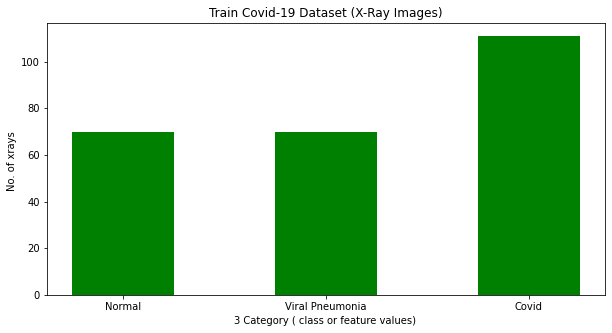

In [18]:
# Print total number of images
count_Normal = len(train_lbl[train_lbl==0])
count_Viral_Pneumonia = len(train_lbl[train_lbl==1])
count_Covid = len(train_lbl[train_lbl==2])

x_axis=["Normal", "Viral Pneumonia", "Covid"]
y_axis=[count_Normal,count_Viral_Pneumonia,count_Covid]

print ('Noral=',count_Normal)
print ('Viral Pneumonia=',count_Viral_Pneumonia)
print ('Covid=',count_Covid)


fig = plt.figure(figsize = (10, 5))
 
# create bars
plt.bar(x_axis, y_axis, color ='green',width = 0.5)

# Set the labels
plt.xlabel("3 Category ( class or feature values) ")
plt.ylabel("No. of xrays ")
plt.title("Train Covid-19 Dataset (X-Ray Images)")
plt.show()

Noral= 20
Viral Pneumonia= 20
Covid= 26


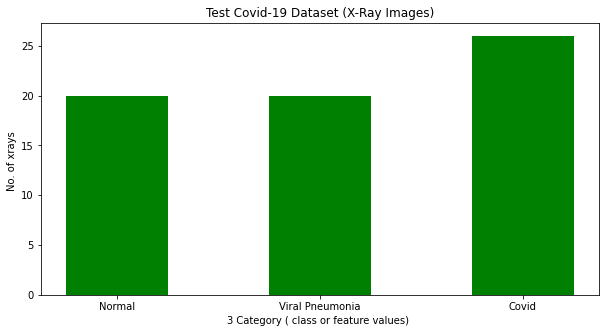

In [19]:
# Print total number of images
count_Normal = len(test_lbl[test_lbl==0])
count_Viral_Pneumonia = len(test_lbl[test_lbl==1])
count_Covid = len(test_lbl[test_lbl==2])

x_axis=["Normal", "Viral Pneumonia", "Covid"]
y_axis=[count_Normal,count_Viral_Pneumonia,count_Covid]

print ('Noral=',count_Normal)
print ('Viral Pneumonia=',count_Viral_Pneumonia)
print ('Covid=',count_Covid)


fig = plt.figure(figsize = (10, 5))
 
# create bars
plt.bar(x_axis, y_axis, color ='green',width = 0.5)

# Set the labels
plt.xlabel("3 Category ( class or feature values) ")
plt.ylabel("No. of xrays ")
plt.title("Test Covid-19 Dataset (X-Ray Images)")
plt.show()

The bar chart displays the total number of normal, viral pneumonia and covid patient x-ray in the given dataset.

### 5 Viewing sample image per disease 

In [20]:
# Function : To show image on the graph panel
def view_image(img,label):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(img)    
    plt.grid(True)
    plt.title("0=Normal, 1=Viral Pneumonia and 2=Covid")
    
    # display the results
    n=classes[int(label)]
        
    plt.title(f"Class = {int(label)}:{n}")
    
    plt.xlabel(label)
    plt.show()

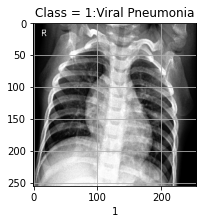

In [21]:
view_image(train_img[0],train_lbl[0])

# D.) MANCHINE LEARNING 

## 1) CNN (Convolutional neural networks)

### configure model

In [22]:
# Create CNN Model object

ml_CNN = tf.keras.models.Sequential([        
    # create 1st convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), input_shape=imgdata_input_size,activation='relu'),    
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.30),
    
    # create 2nd convolutional layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),            
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    # create 3rd convolutional layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),        
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.20),
    
    # create flatten layer
    tf.keras.layers.Flatten(),
    
    # creaate output layer
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dropout(0.25),
    
    # create Batch normalization
    tf.keras.layers.BatchNormalization(),
    
    # create softmax activation layer
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

In [23]:
# Compile CNN Model object
ml_CNN.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

### Execute model

In [24]:
# Execute above model

# Log model start time
t_start=datetime.now()

# fitting the model
ml_CNN_history=ml_CNN.fit(
    
    # Load train dataset
    train_img, 
    to_categorical(train_lbl),
    
    # load test dataset
    validation_data=(test_img,  to_categorical(test_lbl)),
    
    # specify the epochs
    epochs = epochs,)

# Print model execution time
total_time=(datetime.now()-t_start).total_seconds()
print ('Total time:',total_time)
model_analysis = model_analysis.append({'Model':"CNN", 
                                        'parameter':'time_execution',
                                        'value':total_time}, ignore_index=True)

Epoch 1/25
8/8 [==============================] - 14s 119ms/step - loss: 0.6010 - accuracy: 0.7610 - val_loss: 0.7594 - val_accuracy: 0.7121
Epoch 2/25
8/8 [==============================] - 0s 42ms/step - loss: 0.3265 - accuracy: 0.8765 - val_loss: 0.6281 - val_accuracy: 0.7273
Epoch 3/25
8/8 [==============================] - 0s 40ms/step - loss: 0.2759 - accuracy: 0.8884 - val_loss: 0.6586 - val_accuracy: 0.7273
Epoch 4/25
8/8 [==============================] - 0s 43ms/step - loss: 0.1813 - accuracy: 0.9323 - val_loss: 0.9374 - val_accuracy: 0.5606
Epoch 5/25
8/8 [==============================] - 0s 41ms/step - loss: 0.1788 - accuracy: 0.9482 - val_loss: 1.1507 - val_accuracy: 0.3939
Epoch 6/25
8/8 [==============================] - 0s 41ms/step - loss: 0.2085 - accuracy: 0.9243 - val_loss: 0.9540 - val_accuracy: 0.4242
Epoch 7/25
8/8 [==============================] - 0s 41ms/step - loss: 0.1208 - accuracy: 0.9442 - val_loss: 0.9297 - val_accuracy: 0.4545
Epoch 8/25
8/8 [=========

## 2) Pre-Trained test

Keras Application provides a deep learning model with the pre-trained model weights, it used for prediction covid-19 patient detection. pre-trained models description available: https://keras.io/api/applications/

1)	DenseNet121
2)	VGG16
3)	Xception

In [25]:
""" The method will be used to load, create, execute a given pretrained model. """

def preTrained(model, model_name):
    
    global model_analysis
    global model_value
    
    # Pretrained model configration
    conf =    {'input_shape':imgdata_input_size,'include_top':False,'weights':'imagenet'}    
    pmodel = model(**conf)    
    pmodel.trainable = False
    opt=optimizers.Adam(learning_rate=0.0001)
    
     # output setting
    _output = pmodel.output
    _output = Flatten(name= 'flatten')(_output)   
    _output = Dense(total_class, activation = 'softmax')(_output)

    # Create, optimize and compile pretrained model
    pmodel = Model(inputs = pmodel.input, outputs = _output)        
    pmodel.compile(metrics= ["accuracy"], 
                    loss = 'categorical_crossentropy',
                   optimizer=opt)
    
    # Log model start time
    t_start=datetime.now()
    
    # fit model
    history = pmodel.fit(
        # pass train data
        train_img, to_categorical(train_lbl),
        
        # pass test data
        validation_data=(test_img,  to_categorical(test_lbl)),
        
        # number of samples to work through
        batch_size=10,
        
        # pass number of epochs
        epochs = epochs, 
        
        shuffle=True, 
        callbacks=[
            ModelCheckpoint(filepath="w.h5", verbose=1, save_best_only=1),
            EarlyStopping(mode='min',  monitor='val_loss', verbose=1,patience=10)])
    
    
    # fill weight suitable weight from file and compile model
    pmodel.load_weights('w.h5')    
    pmodel.compile(metrics= ["accuracy"], loss = 'categorical_crossentropy', optimizer=opt)

    # Print model execution time
    time_execution=(datetime.now()-t_start).total_seconds()
    print ('Total time for model:',time_execution)    
    #model_analysis = {model: {"time_execution":time_execution}}
    #model_value[model_name] ["time_execution"]=time_execution
    model_analysis = model_analysis.append({'Model':model_name, 'parameter':'time_execution', 'value':time_execution}, ignore_index=True)
    
    
    # Log model start time
    t_start=datetime.now()
    
    # Predit covid xrays for test dataset
    output_predict = []
    for idx in pmodel.predict(test_img):
        output_predict.append(np.argmax(idx))

    # parse to array type
    output_predict = np.asarray(output_predict)
    
    # Print model execution time
    time_predict=(datetime.now()-t_start).total_seconds()
    print ('Total time for prediction test sample :',time_predict)
    #model_analysis = {model: {"time_predict":time_predict}}
    #model_value[model_name] ["time_predict"]=time_predict
    model_analysis = model_analysis.append({'Model':model_name, 'parameter':'time_predict', 'value':time_predict}, ignore_index=True)
    
    # Return model, history and output predicted values
    return pmodel, history, output_predict

In [26]:
def detect_xray_disease(model, img, original_label):

    # Show image on the screen
    view_image(img,original_label)

    # Predict disease
    img= np.expand_dims(img, axis=0)   
    result=model.predict(img)

    # display the results
    v=np.argmax(result)
    n=classes[v]    
    print(f"\nCNN predicted X-Ray image as {v}:{n}.")
    
    return v,n

In [27]:
def save_classification_report(model_name,report):
    global model_analysis
     # Extract value from classification report
    for line in report.split('\n'):
        row = line.split('      ')
        if len(row)==6:
            if len(str(row[2]).strip())>0 and len(str(row[3]).strip())>0 and len(str(row[4]).strip())>0 :
                model_analysis = model_analysis.append({'Model':model_name, 'parameter':str(row[1]).strip(), 'value':row[2]}, ignore_index=True)
                model_analysis = model_analysis.append({'Model':model_name, 'parameter':str(row[1]).strip(), 'value':row[3]}, ignore_index=True)
                model_analysis = model_analysis.append({'Model':model_name, 'parameter':str(row[1]).strip(), 'value':row[4]}, ignore_index=True)
                model_analysis = model_analysis.append({'Model':model_name, 'parameter':str(row[1]).strip(), 'value':row[5]}, ignore_index=True)

In [28]:
""" The method to visulize model charts """
def preTrained_graphs(history,output_predict, model_name):
   
    global model_analysis
    global model_value
    # Calculations
    score=accuracy_score(test_lbl, output_predict) *100
    
    #model_analysis = {model: {"score":score}}
    model_analysis = model_analysis.append({'Model':model_name, 'parameter':'score', 'value':score}, ignore_index=True)
    #model_value[model_name] ["score"]=score
    
    # display accuracy graph
    x=['Accuracy']
    y=[score]
    fig = plt.figure(figsize = (15, 1))
    plt.barh(x, y, color ='green')        
    plt.xlabel(f"Accuracy Score:{score:.2f}%")   
    plt.title(f" {model_name}" ,fontsize = 18, color="green")
    plt.show()
    
    # Model accuracy and loss at epochs
    plt.figure(figsize=(15,5))    
    # ACCURACY
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], color='gold',label = "Training")
    plt.plot(history.history['val_accuracy'], linewidth=2,linestyle='dashed',label="Validation")
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.title(f"Accuracy with {model_name} model at each epoch")
    plt.legend()

    # LOSS
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], color='gold',label = "Training")
    plt.plot(history.history['val_loss'], linewidth=2,linestyle='dashed', label="Validation")
    plt.ylabel('loss')
    plt.xlabel('epoch')    
    plt.legend()
    plt.title(f"Loss with {model_name} model at each epoch")
    plt.show()
   
    # Confusion matrix analysis
    cmatrix = confusion_matrix(test_lbl,  output_predict
                               #,normalize='all'
                              )
    cmatrix_display = ConfusionMatrixDisplay (cmatrix,display_labels=['Normal','Viral Pneumonia','Covid-19'])
    cmatrix_display.plot()
    cmatrix_display.ax_.set(title='Confusion Matrix (CM) actual vs predicted', xlabel='Predicted', ylabel='Actual') 
    plt.show()
    
   
    # Classification Report    
    report = classification_report(test_lbl,
                                   output_predict,
                                   labels=np.arange(3),
                                   target_names=['Normal','Viral Pneumonia','Covid-19'],
                                   output_dict=True)
    sb.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
    
    # show classification reprot table    
    report = classification_report(test_lbl, output_predict)
    save_classification_report(model_name,report)
    print(report)
    

In [29]:
def detect_xray_path_disease(model, xray_location, original_label):
    img=load_preprocess_images(xray_location)
    detect_xray_disease(model,img,original_label)

In [30]:
def detect_disease(model, locations, original_label):      
    index=0

    f, g = plt.subplots(nrows=1,ncols=4, figsize=(22, 10))

    for i, axis in enumerate(g.flat):    

        if index<len(locations):
            
            path = gdp + locations[index]
            img=load_preprocess_images(path)
            img_p= np.expand_dims(img, axis=0)   
            outcome=model.predict(img_p)

            v=np.argmax(outcome)
            n=classes[v]      
            print(f"\nPredicted X-Ray image as {v}:{n}.")
            
            axis.imshow(img)
            if original_label==n:
                axis.set_title(f"Actual:{original_label} \nPredicted:{n}",fontsize = 18, color="green")             
            else:
                axis.set_title(f"Actual:{original_label} \nPredicted:{n}",fontsize = 18, color="red")
                
            index=index+1
            
    plt.show()

In [31]:
def model_execution(index):
    
    # execute each pre-trained model one by one
    print('\n----------------------------------------------------------------------------------')
    print(f"\n {(index+1)} : { pre_trained_models_names[index] }")
    print('\n----------------------------------------------------------------------------------')

    # 1 Create, fit, compile the model and predict test data
    model1,history1,predict1 = preTrained(pre_trained_models[index],pre_trained_models_names[index])

    # 2 analyze the model
    preTrained_graphs(history1,predict1,pre_trained_models_names[index])

    # 3 predict covid-19 patient
    detect_disease(model1, test_covid19,"Covid-19")
    detect_disease(model1, test_normals,"Normal")
    detect_disease(model1, test_vp,"Viral Pneumonia")

In [32]:
model_analysis =  pd.DataFrame( columns=['Model','parameter','value'])

### VGG16


----------------------------------------------------------------------------------

 1 : VGG16

----------------------------------------------------------------------------------
58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/25
26/26 [==============================] - ETA: 0s - loss: 0.8940 - accuracy: 0.6175
Epoch 1: val_loss improved from inf to 0.66162, saving model to w.h5
26/26 [==============================] - 3s 69ms/step - loss: 0.8940 - accuracy: 0.6175 - val_loss: 0.6616 - val_accuracy: 0.7879
Epoch 2/25
25/26 [===========================>..] - ETA: 0s - loss: 0.4709 - accuracy: 0.8760
Epoch 2: val_loss improved from 0.66162 to 0.48832, saving model to w.h5
26/26 [==============================] - 1s 40ms/step - loss: 0.4710 - accuracy: 0.8765 - val_loss: 0.4883 - val_accuracy: 0.8485
Epoch 3/25
25/26 [===========================>..] - ETA: 0s - loss: 0.3401 - accuracy: 0.9160
Epoch 3: val_loss improved from 0.48832 to 0.38822, saving model to w.h

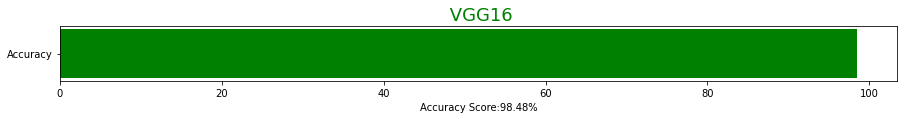

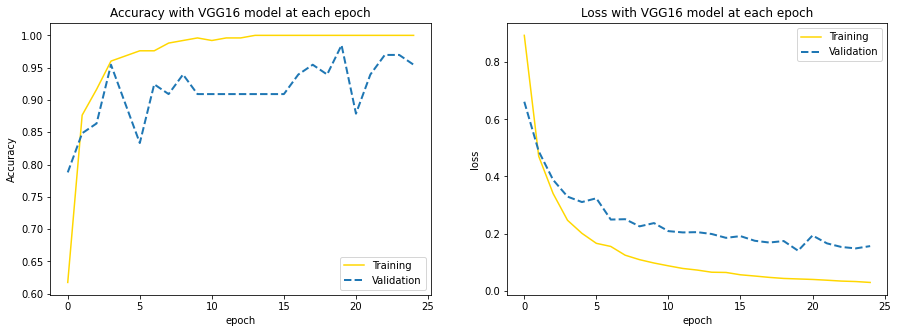

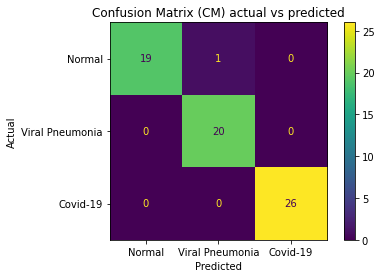

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        26

    accuracy                           0.98        66
   macro avg       0.98      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66


Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.


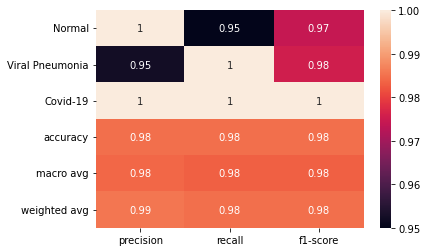

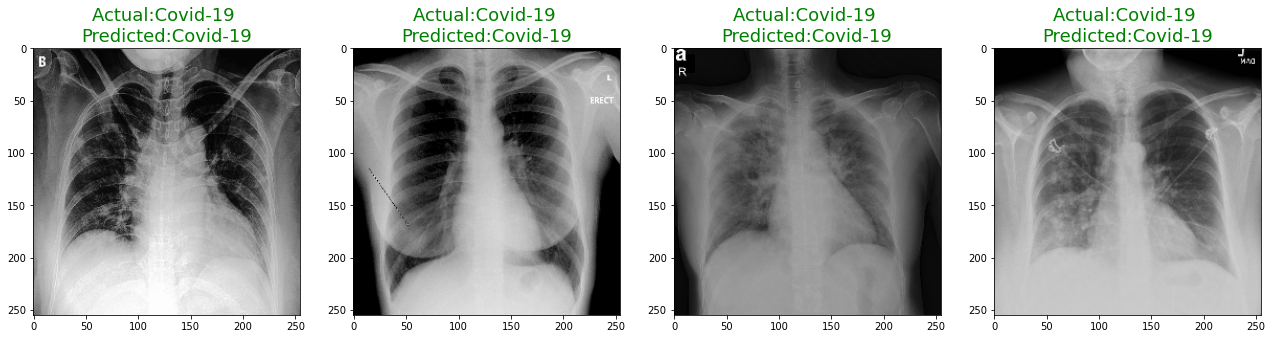


Predicted X-Ray image as 0:Normal.

Predicted X-Ray image as 0:Normal.

Predicted X-Ray image as 0:Normal.

Predicted X-Ray image as 0:Normal.


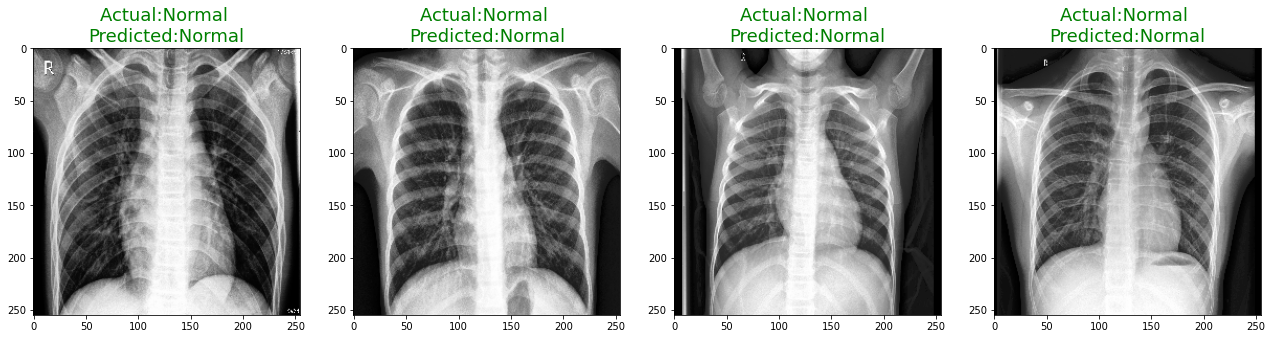


Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 1:Viral Pneumonia.


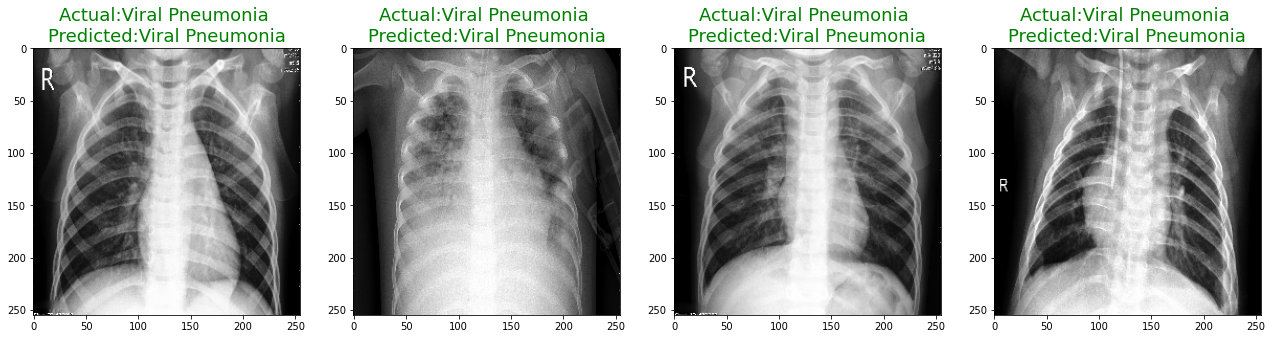

In [33]:
model_execution(0)

In [34]:
### Xception


----------------------------------------------------------------------------------

 2 : Xception

----------------------------------------------------------------------------------
83697664/83683744 [==============================] - 1s 0us/step
Epoch 1/25
26/26 [==============================] - ETA: 0s - loss: 0.4019 - accuracy: 0.8446
Epoch 1: val_loss improved from inf to 0.34336, saving model to w.h5
26/26 [==============================] - 5s 92ms/step - loss: 0.4019 - accuracy: 0.8446 - val_loss: 0.3434 - val_accuracy: 0.8939
Epoch 2/25
25/26 [===========================>..] - ETA: 0s - loss: 0.1217 - accuracy: 0.9520
Epoch 2: val_loss improved from 0.34336 to 0.18483, saving model to w.h5
26/26 [==============================] - 1s 44ms/step - loss: 0.1213 - accuracy: 0.9522 - val_loss: 0.1848 - val_accuracy: 0.9394
Epoch 3/25
25/26 [===========================>..] - ETA: 0s - loss: 0.0268 - accuracy: 0.9960
Epoch 3: val_loss did not improve from 0.18483
26/26 [==============

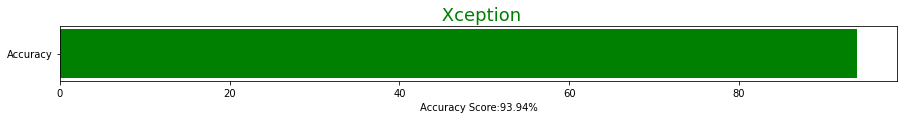

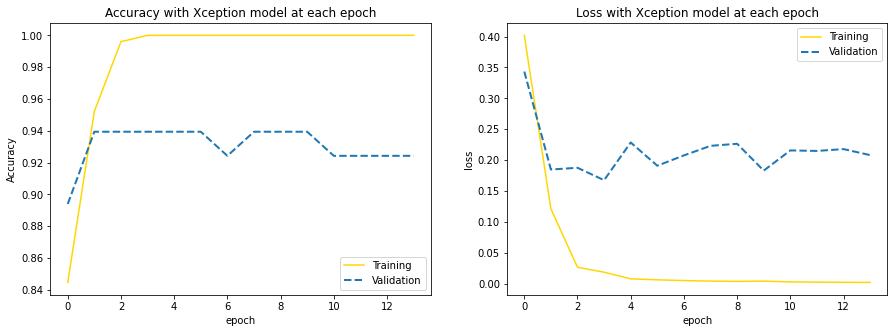

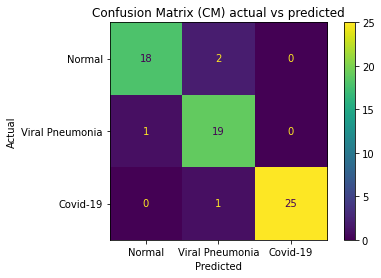

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.86      0.95      0.90        20
           2       1.00      0.96      0.98        26

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66


Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.


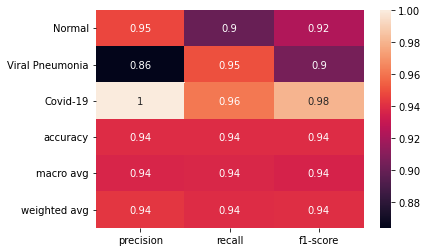

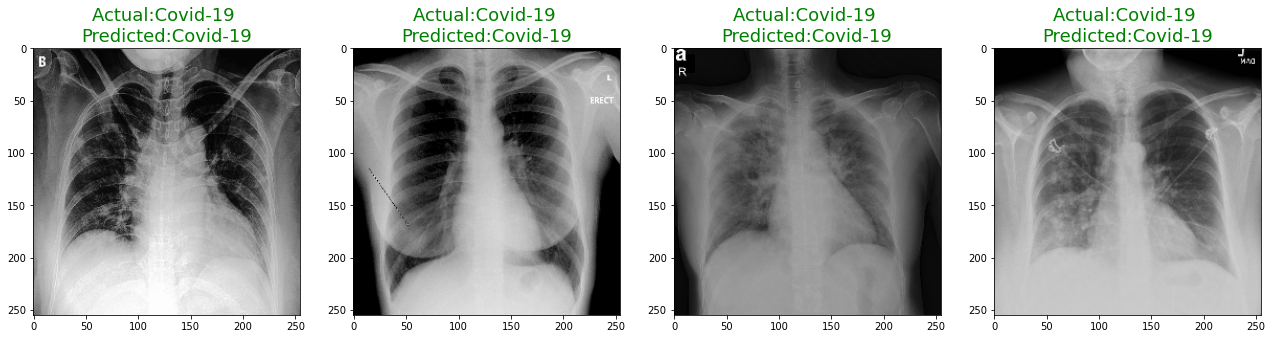


Predicted X-Ray image as 0:Normal.

Predicted X-Ray image as 0:Normal.

Predicted X-Ray image as 0:Normal.

Predicted X-Ray image as 0:Normal.


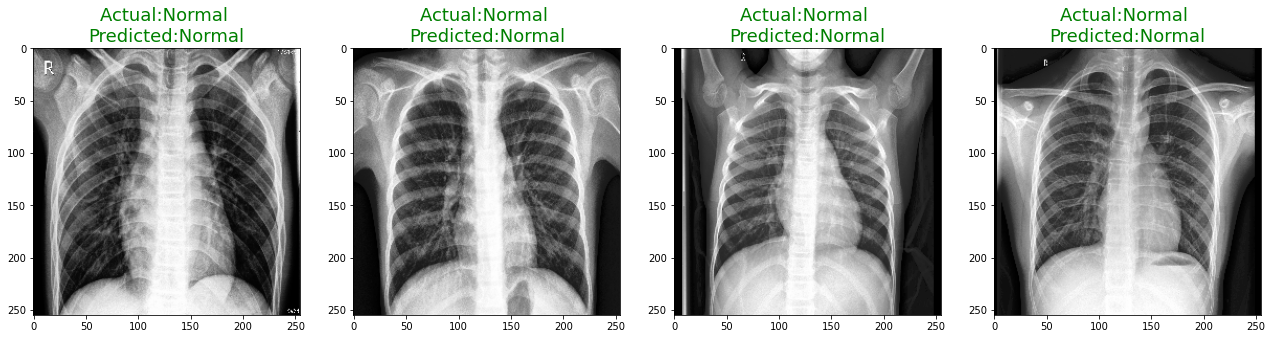


Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 1:Viral Pneumonia.


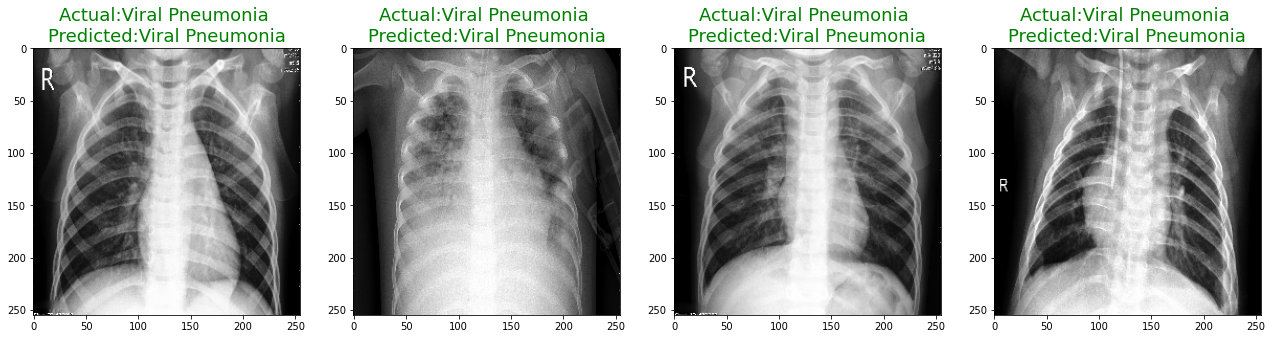

In [35]:
model_execution(1)

### Evaluate CNN

Total time for prediction test sample : 0.177207


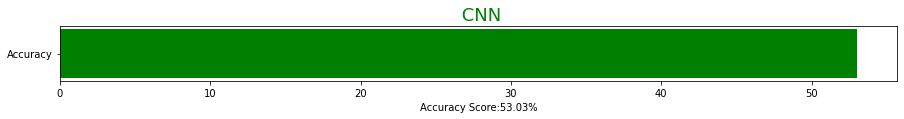

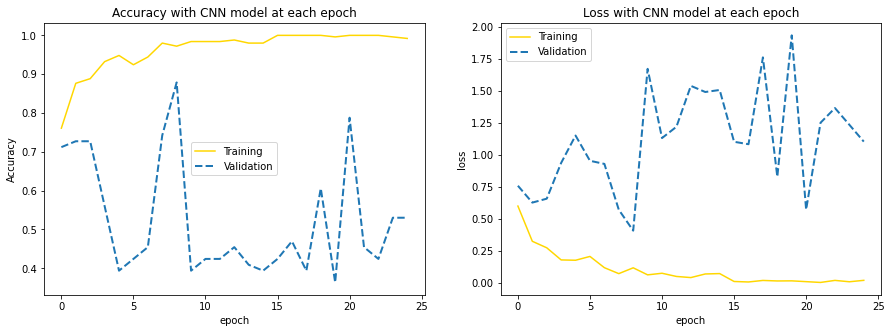

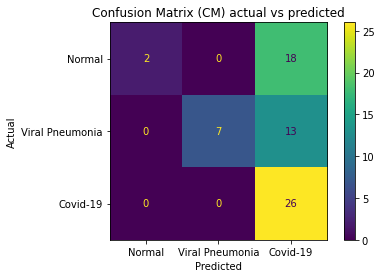

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       1.00      0.35      0.52        20
           2       0.46      1.00      0.63        26

    accuracy                           0.53        66
   macro avg       0.82      0.48      0.44        66
weighted avg       0.79      0.53      0.46        66



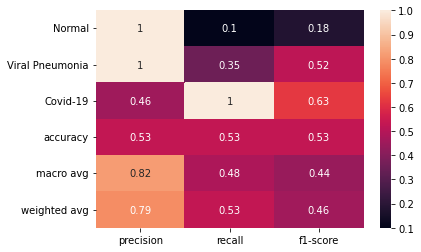

In [36]:
# Log model start time
t_start=datetime.now()

    
# Predit covid xrays for test dataset
cnn_predict = []
for idx in ml_CNN.predict(test_img):
    cnn_predict.append(np.argmax(idx))

# parse to array type
cnn_predict = np.asarray(cnn_predict)

# Print model execution time
time_predict=(datetime.now()-t_start).total_seconds()
print ('Total time for prediction test sample :',time_predict)

model_analysis = model_analysis.append({'Model':"CNN", 'parameter':'time_predict', 'value':time_predict}, ignore_index=True)

 # 2 analyze the model
preTrained_graphs(ml_CNN_history,cnn_predict,"CNN")


Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.


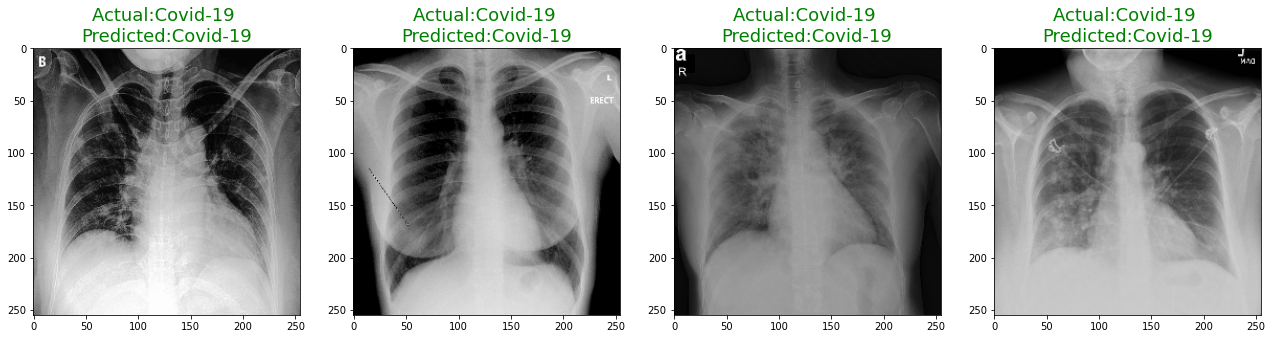


Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 2:Covid-19.


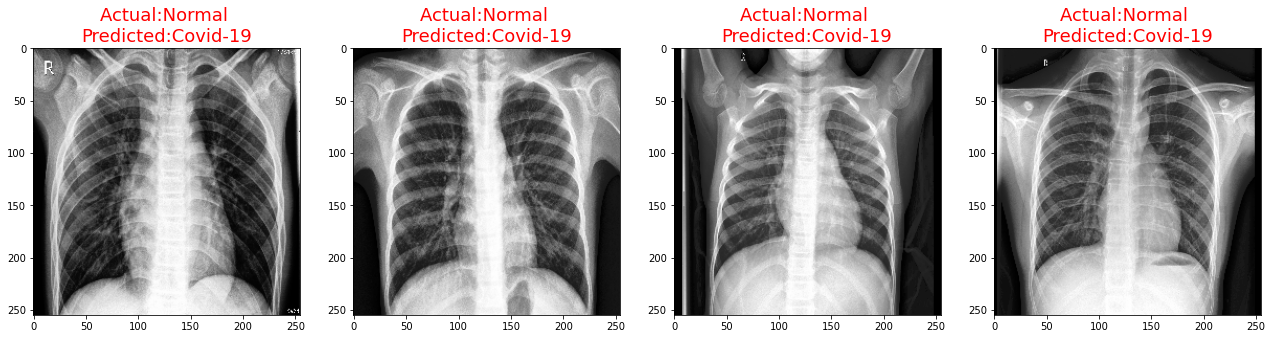


Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 2:Covid-19.

Predicted X-Ray image as 1:Viral Pneumonia.

Predicted X-Ray image as 1:Viral Pneumonia.


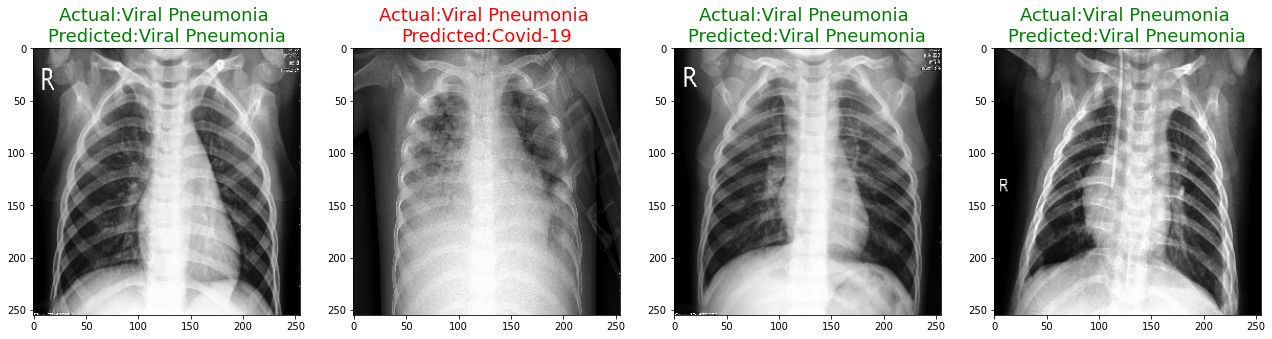

In [37]:
# 3 predict covid-19 patient
detect_disease(ml_CNN, test_covid19,"Covid-19")
detect_disease(ml_CNN, test_normals,"Normal")
detect_disease(ml_CNN, test_vp,"Viral Pneumonia")

### 3.) Analysis

In [38]:
def view_bars(obj):
    # Model analysis graph-1    
    plt.figure()
    print(obj)
    sb.factorplot(x='Model', y='value', hue='parameter', data=obj, kind='bar', size=4, aspect=2)
    plt.title('Comparative analysis of graphs', fontsize = 15)
    plt.xticks(rotation=75)
    plt.xlabel("Models")
    plt.ylabel("value")
    plt.show()

       Model parameter      value
31       CNN     score  53.030303
17  Xception     score  93.939394
2      VGG16     score  98.484848


<Figure size 432x288 with 0 Axes>

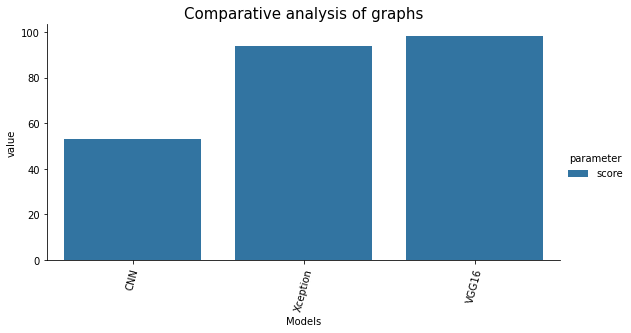

In [39]:
# Model analysis graph-1
g1=model_analysis[model_analysis['parameter'] == 'score'] 
g1=g1.sort_values(by=['value'])
view_bars(g1)

       Model       parameter      value
0      VGG16  time_execution  26.484812
1      VGG16    time_predict   1.293692
15  Xception  time_execution  15.750574
16  Xception    time_predict   1.362413
30       CNN    time_predict   0.177207


<Figure size 432x288 with 0 Axes>

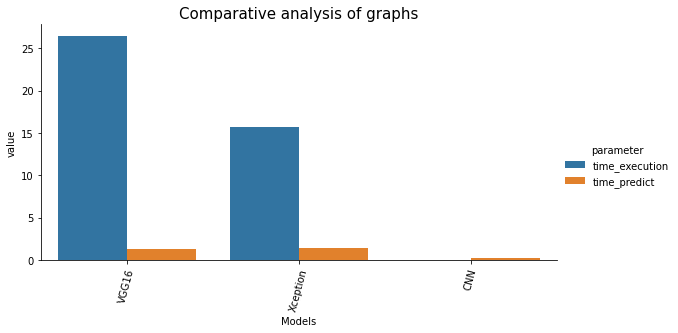

In [40]:
# Model analysis graph-1
g1=model_analysis[model_analysis['parameter'].isin(['time_predict','time_execution'])] 
#g1=g1.sort_values(by=['value'])
view_bars(g1)

In [41]:
model_analysis

Model       parameter      value
0      VGG16  time_execution  26.484812
1      VGG16    time_predict   1.293692
2      VGG16           score  98.484848
3      VGG16               0       1.00
4      VGG16               0       0.95
5      VGG16               0       0.97
6      VGG16               0         20
7      VGG16               1       0.95
8      VGG16               1       1.00
9      VGG16               1       0.98
10     VGG16               1         20
11     VGG16               2       1.00
12     VGG16               2       1.00
13     VGG16               2       1.00
14     VGG16               2         26
15  Xception  time_execution  15.750574
16  Xception    time_predict   1.362413
17  Xception           score  93.939394
18  Xception               0       0.95
19  Xception               0       0.90
20  Xception               0       0.92
21  Xception               0         20
22  Xception               1       0.86
23  Xception               1       0.95
24  Xception               1       0.90
25  Xception               1         20
26  Xception               2       1.00
27  Xception               2       0.96
28  Xception               2       0.98
29  Xception               2         26
30       CNN    time_predict   0.177207
31       CNN           score  53.030303
32       CNN               0       1.00
33       CNN               0       0.10
34       CNN               0       0.18
35       CNN               0         20
36       CNN               1       1.00
37       CNN               1       0.35
38       CNN               1       0.52
39       CNN               1         20
40       CNN               2       0.46
41       CNN               2       1.00
42       CNN               2       0.63
43       CNN               2         26